In [2]:
import qiskit as q
from qiskit_aer import AerProvider
from qiskit.visualization import plot_bloch_multivector, plot_histogram
import math

provider = AerProvider()
qasm_sim = provider.get_backend("qasm_simulator")
statevec_sim = provider.get_backend("statevector_simulator")

# Uncertain Qubits

In [3]:
c = q.QuantumCircuit(2, 2)
c.ry(math.pi/4, 0)
c.ry(math.pi/4, 1)

orig_statevec = statevec_sim.run(c).result().get_statevector()
c.measure([0, 1], [0, 1])
c.draw()

┌─────────┐┌─┐   
q_0: ┤ Ry(π/4) ├┤M├───
     ├─────────┤└╥┘┌─┐
q_1: ┤ Ry(π/4) ├─╫─┤M├
     └─────────┘ ║ └╥┘
c: 2/════════════╩══╩═
                 0  1

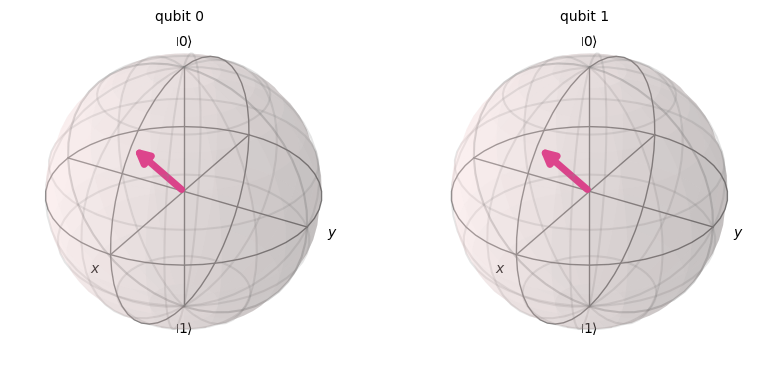

In [4]:
plot_bloch_multivector(orig_statevec)

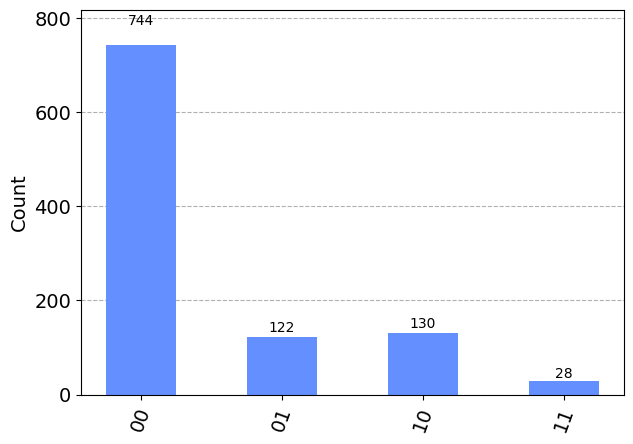

In [5]:
orig_counts = qasm_sim.run(c, shots=1024).result().get_counts()

plot_histogram([orig_counts])

# Uncertain Qubits, hadamards at front

In [6]:
c = q.QuantumCircuit(2, 2)

c.h(0)
c.h(1)

c.ry(math.pi/4, 0)
c.ry(math.pi/4, 1)

statevec = statevec_sim.run(c).result().get_statevector()
c.measure([0, 1], [0, 1])
c.draw()

┌───┐┌─────────┐┌─┐   
q_0: ┤ H ├┤ Ry(π/4) ├┤M├───
     ├───┤├─────────┤└╥┘┌─┐
q_1: ┤ H ├┤ Ry(π/4) ├─╫─┤M├
     └───┘└─────────┘ ║ └╥┘
c: 2/═════════════════╩══╩═
                      0  1

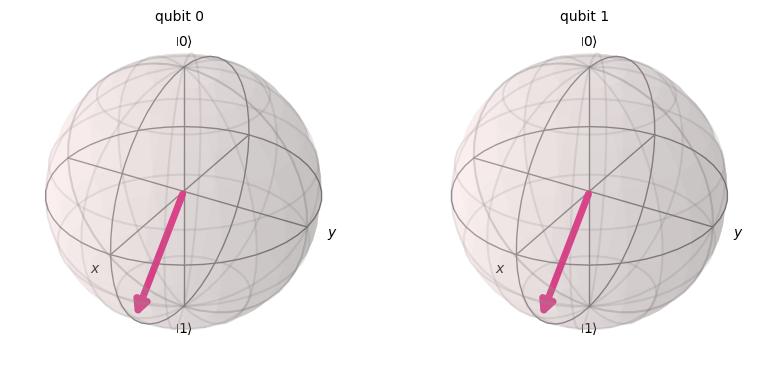

In [7]:
plot_bloch_multivector(statevec)

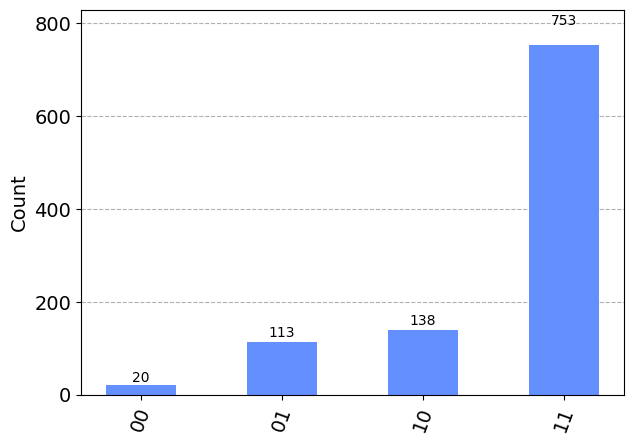

In [8]:
counts = qasm_sim.run(c, shots=1024).result().get_counts()

plot_histogram([counts])

# hadamard sandwich on uncertain qubits

In [13]:
c = q.QuantumCircuit(2, 2)
c.h(0)
c.h(1)
c.ry(math.pi/4, 0)
c.ry(math.pi/4, 1)
c.h(0)
c.h(1)
statevec = statevec_sim.run(c).result().get_statevector()
c.measure([0, 1], [0, 1])
c.draw()

┌───┐┌─────────┐┌───┐┌─┐   
q_0: ┤ H ├┤ Ry(π/4) ├┤ H ├┤M├───
     ├───┤├─────────┤├───┤└╥┘┌─┐
q_1: ┤ H ├┤ Ry(π/4) ├┤ H ├─╫─┤M├
     └───┘└─────────┘└───┘ ║ └╥┘
c: 2/══════════════════════╩══╩═
                           0  1

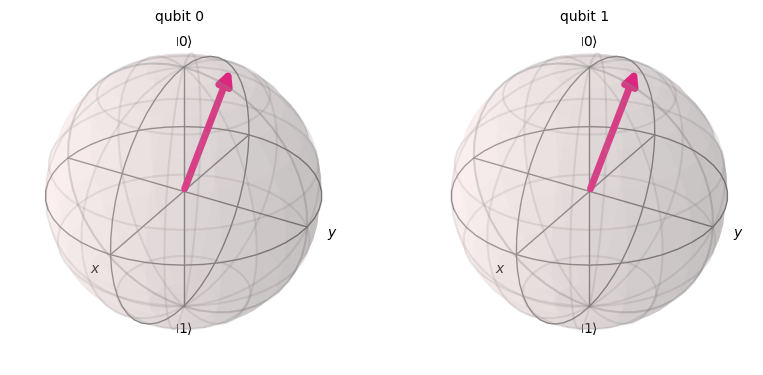

In [14]:
plot_bloch_multivector(statevec)

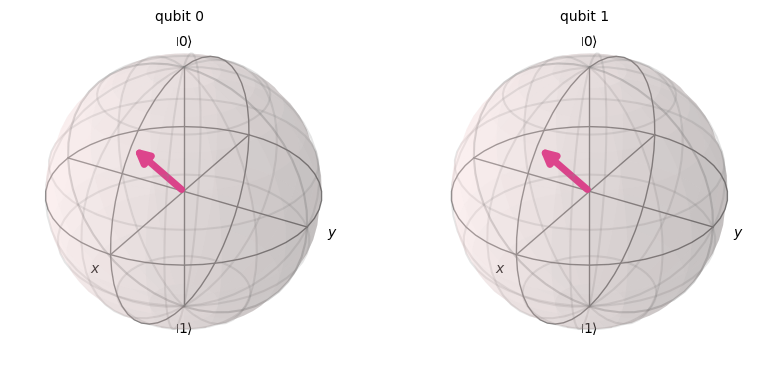

In [15]:
plot_bloch_multivector(orig_statevec)